# Practical Time Series Analysis

## Week 4: AR(p) processes, Yule-Walker equations, PACF

**1. PACF**

**2. Yule-Walker**

**3. Examples and Datasets**

In [14]:
# devtools::install_github("FinYang/tsdl")

Error in get(genname, envir = envir) : 
  objeto 'testthat_print' não encontrado



Please download and install Rtools 3.5 from https://cran.r-project.org/bin/windows/Rtools/.

Please download and install Rtools 3.5 from https://cran.r-project.org/bin/windows/Rtools/.


v  checking for file 'C:\Users\LHTO\AppData\Local\Temp\Rtmpqg99fK\remotes42a07d066828\FinYang-tsdl-56e0915/DESCRIPTION' (700ms)
-  preparing 'tsdl': (16s)
v  checking DESCRIPTION meta-information ... 
-  checking for LF line-endings in source and make files and shell scripts (627ms)
-  checking for empty or unneeded directories
-  looking to see if a 'data/datalist' file should be added
-  building 'tsdl_0.1.0.tar.gz'
   


In [61]:
library(tsdl)
library(isdals)
library(ppcor)

Loading required package: MASS


## 1. PACF

### 1.1. General idea

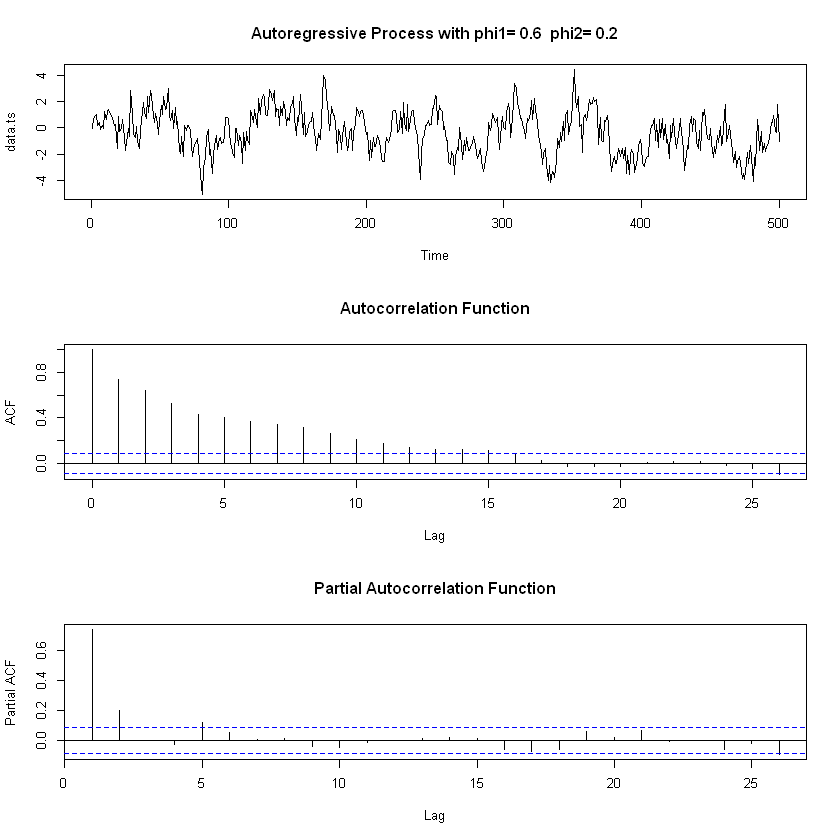

In [2]:
# AR(2) process
par(mfrow=c(3,1))

phi.1 = .6
phi.2 = .2
data.ts = arima.sim(n = 500, list(ar = c(phi.1, phi.2)))

plot(data.ts, main= paste("Autoregressive Process with phi1=",phi.1," phi2=",phi.2) )
acf(data.ts, main="Autocorrelation Function")
acf(data.ts, type="partial", main="Partial Autocorrelation Function")

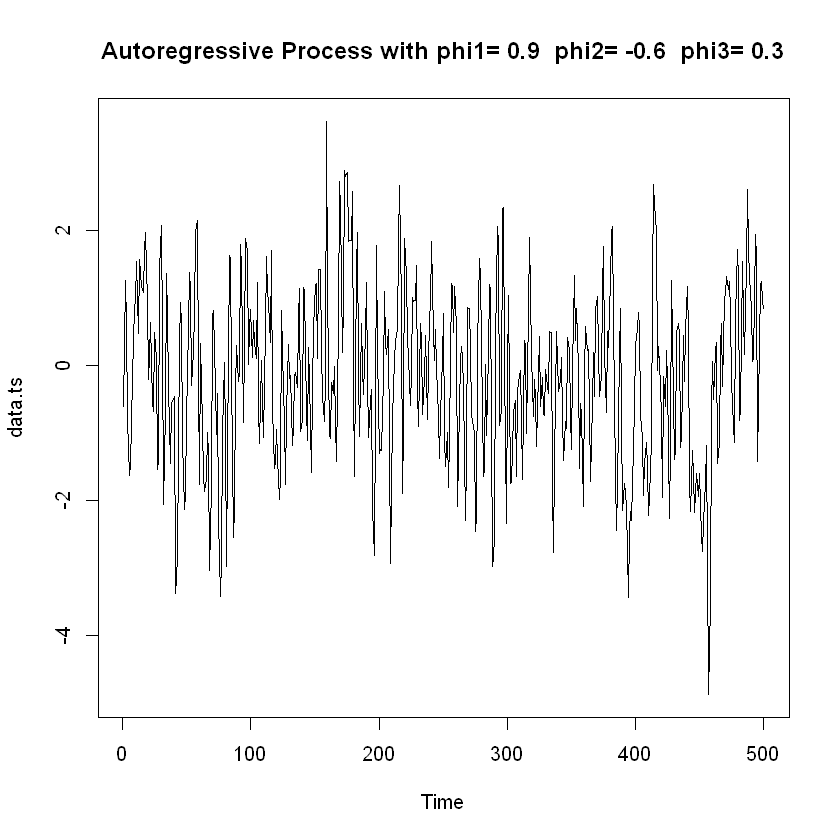

In [3]:
# AR(3) process
phi.1 = .9
phi.2 = -.6
phi.3 = .3
data.ts = arima.sim(n = 500, list(ar = c(phi.1, phi.2, phi.3)))
plot(data.ts, main= paste("Autoregressive Process with phi1=", phi.1," phi2=",phi.2," phi3=",phi.3) ) 

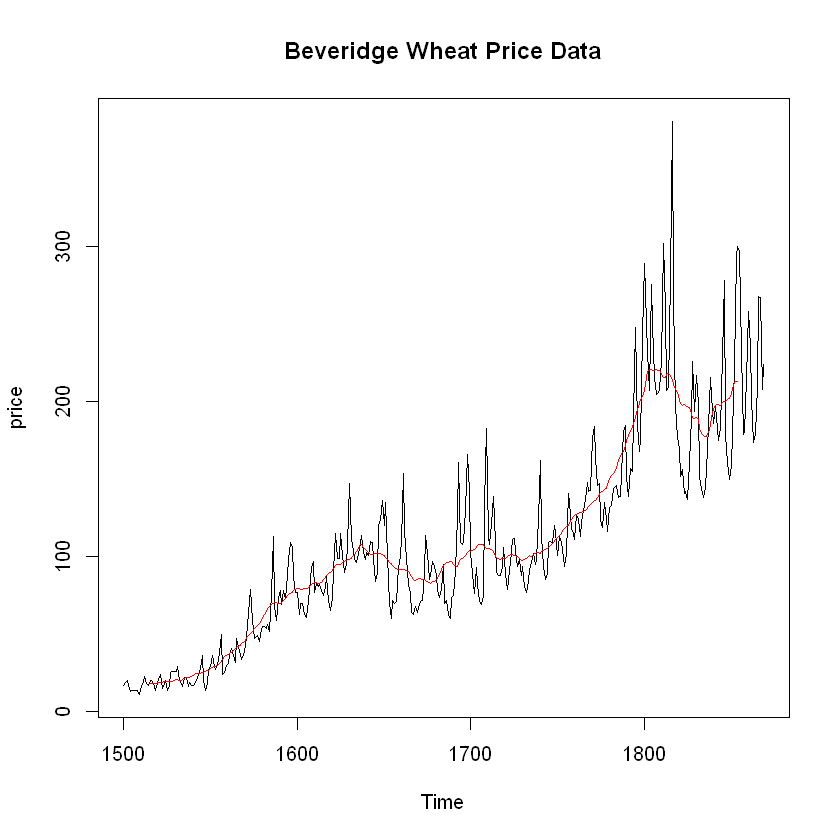

In [50]:
# Beveridge Wheat Price Time Series
beveridge = subset(tsdl, description = "Beveridge")[[1]]
beveridge.ts = ts(beveridge, start=1500)
plot( beveridge.ts, ylab="price", main="Beveridge Wheat Price Data")
beveridge.MA = filter(beveridge.ts, rep(1/31, 31), sides = 2)
lines(beveridge.MA, col="red")

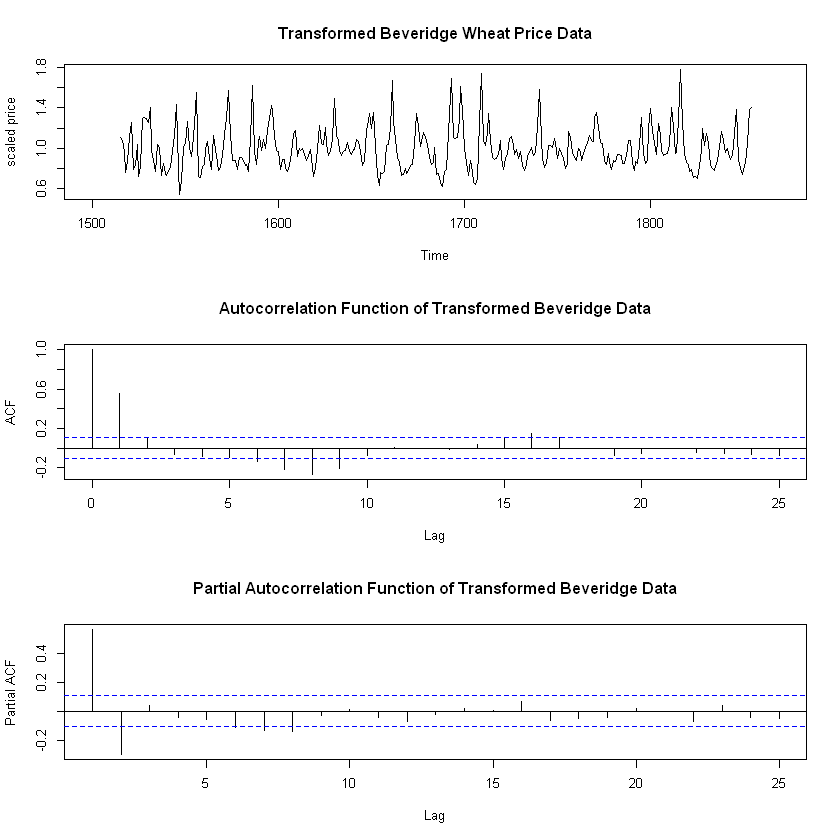

In [52]:
# Scale price by MA process
par(mfrow=c(3,1))

Y =  beveridge.ts / beveridge.MA
plot( Y, ylab="scaled price", main="Transformed Beveridge Wheat Price Data")
acf(na.omit(Y), main="Autocorrelation Function of Transformed Beveridge Data")
acf(na.omit(Y), type="partial",  main="Partial Autocorrelation Function of Transformed Beveridge Data") 

In [53]:
ar(na.omit(Y), order.max = 5)


Call:
ar(x = na.omit(Y), order.max = 5)

Coefficients:
      1        2  
 0.7239  -0.2957  

Order selected 2  sigma^2 estimated as  0.02692

**AR($p$) has a PACF that cuts off after $p$ lags.**

### 1.2. PACF Definition

**Bodyfat dataset:**

* Fat: body fat
* Thigh: thigh circumference
* Triceps: triceps skinfold measurement
* Midarm: mid-arm circumference

**Goal:** measure the correlation of Fat and Triceps, after controlling for or "partialling out" Thigh

**Method:** look at the residuals of Fat and Triceps after regressing both of them on Thigh

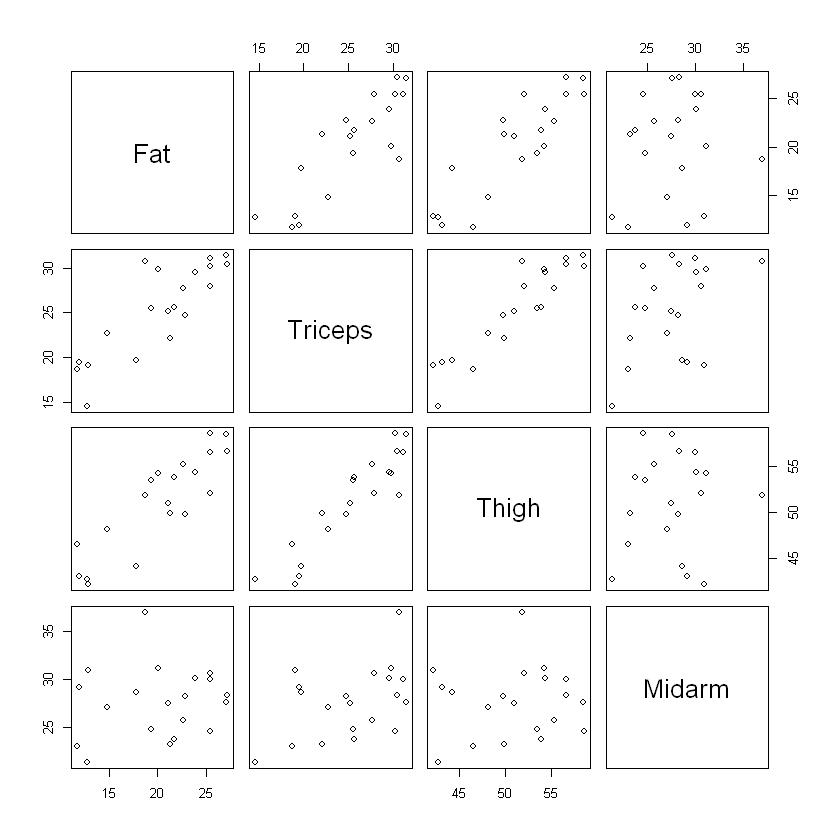

In [57]:
# bodyfat dataset
data(bodyfat)
attach(bodyfat)
pairs( cbind( Fat, Triceps, Thigh, Midarm) ) 

In [58]:
# correlations
cor( cbind( Fat, Triceps, Thigh, Midarm) )

,Fat,Triceps,Thigh,Midarm
Fat,1.0000000,0.8432654,0.8780896,0.1424440
Triceps,0.8432654,1.0000000,0.9238425,0.4577772
Thigh,0.8780896,0.9238425,1.0000000,0.0846675
Midarm,0.1424440,0.4577772,0.0846675,1.0000000


In [59]:
# correlation between Fat and Triceps regression residuals on Thigh
Fat.hat = predict(lm(Fat~Thigh))
Triceps.hat = predict( lm(Triceps~Thigh) )
cor( (Fat- Fat.hat), (Triceps- Triceps.hat) ) 

[1] 0.1749822

In [64]:
# ppcor for controled residuals for all variables
pcor( cbind( Fat, Triceps, Thigh) ) # same result

,Fat,Triceps,Thigh
Fat,1.0000000,0.1749822,0.4814109
Triceps,0.1749822,1.0000000,0.7130120
Thigh,0.4814109,0.7130120,1.0000000
,Fat,Triceps,Thigh
Fat,0.00000000,0.4736789763,0.0368987227
Triceps,0.47367898,0.0000000000,0.0006109801
Thigh,0.03689872,0.0006109801,0.0000000000
,Fat,Triceps,Thigh
Fat,0.0000000,0.7327755,2.264597
Triceps,0.7327755,0.0000000,4.192849


In [65]:
# correlation between Fat and Triceps controlling for Thigh and Midarm
Fat.hat = predict(lm(Fat~Thigh+Midarm))
Triceps.hat  = predict( lm(Triceps~Thigh+Midarm) )
cor( (Fat- Fat.hat), (Triceps- Triceps.hat) )

[1] 0.33815

In [67]:
# ppcor for controled residuals for all variables
pcor( cbind( Fat, Triceps, Thigh, Midarm) )

,Fat,Triceps,Thigh,Midarm
Fat,1.0000000,0.3381500,-0.2665991,-0.3240520
Triceps,0.3381500,1.0000000,0.9963725,0.9955918
Thigh,-0.2665991,0.9963725,1.0000000,-0.9926612
Midarm,-0.3240520,0.9955918,-0.9926612,1.0000000
,Fat,Triceps,Thigh,Midarm
Fat,0.0000000,1.699111e-01,2.848944e-01,1.895628e-01
Triceps,0.1699111,0.000000e+00,1.490492e-18,7.071386e-18
Thigh,0.2848944,1.490492e-18,0.000000e+00,4.134178e-16
Midarm,0.1895628,7.071386e-18,4.134178e-16,0.000000e+00
,Fat,Triceps,Thigh,Midarm


**Back to AR(p) Processes**

Estimate by looking **backward** over the last several terms and denote by $\hat{x}_{t + h}$ the regression of term $x_{t + h}$:

$
\hat{x}_{t+h} = \beta_1 x_{t+h-1} + \beta_2 x_{t+h-2} + ... + \beta_{h - 1} x_{t+1}
$

Estimate by looking **forward** over the next several terms and denote by $\hat{x}_{t}$ the regression of term $x_{t}$:

$
\hat{x}_{t} = \beta_1 x_{t+1} + \beta_2 x_{t+2} + ... + \beta_{h - 1} x_{t+h-1}
$

Define a partial autocorrelation function:

$
corr[(x_{t+h} - \hat{x}_{t+h}), (x_t - \hat{x}_t)]
$

We remove the linear effects of all the terms between the two random variables.

The excess correlation at $lag = k$ not accounted for by a $(k - 1)^{st}$ order model, is the partial correlation at $lag = k$.

## 2. Yule-Walker